## Project Details
* DOMAIN: Entertainment

* CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer
vision and multimedia experts who need to detect faces from screen shots from the movie scene.
* TASK: Help to create an image dataset to be used by the AI team to build an image classifier data. Profile images of people are given.
1. You are expected to curate the bounding box co-ordinates for each image. These are also called annotations.
2. This task can be done using manual methods where you need to open each image and note the coordinates where the face located
[though it is not recommended]. This task can be easily done using an automation where you need to input the image in the
automation and the output is the coordinates of the face detected from the image. [this is highly recommended]. Also highlight how
many faces detected in each image.

### Face detection using dlib's CNN face detector and opencv

### Importing necessary libraries

In [5]:
# Firstly let's select Tensorflow 2.x on colab

%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [6]:
!pip install dlib --quiet

In [7]:
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()

	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image because dlib can also end up giving negative coords
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])

	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY

	# return our bounding box coordinates
	return (startX, startY, w, h)

[INFO] loading CNN face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 2.8373 seconds


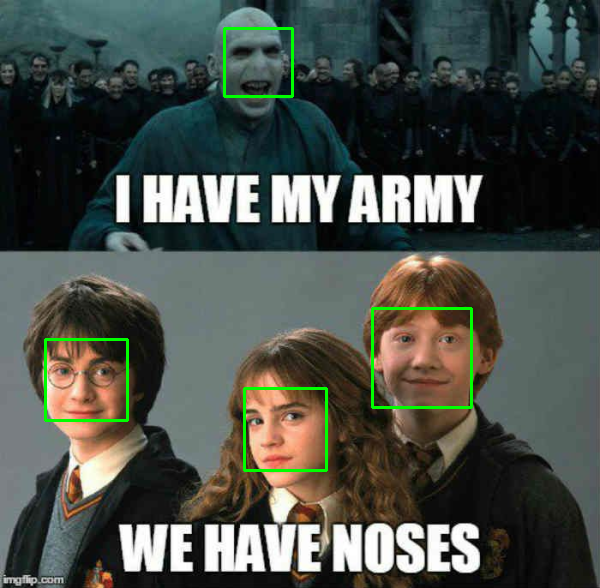

-1

In [8]:
#USAGE 
# import the necessary the packages
import imutils
import time
import dlib
import cv2
from google.colab.patches import cv2_imshow


# load dlib's CNN face detector
print("[INFO] loading CNN face detector...")
detector = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')

# load the input image from disk, resize it, and convert it from
# BGR to RGB channel ordering (which is what dlib expects)
image = cv2.imread('/content/harry_1.jpg')
image = imutils.resize(image, width=600)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# perform face detection using dlib's face detector
start = time.time()
print("[INFO[ performing face detection with dlib...")
results = detector(rgb, 1)
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r.rect) for r in results]

# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
cv2_imshow(image)
cv2.waitKey(0)

In [50]:
import pandas as pd
# Now we will try to do the same for a series of images and put it into a function that returns a dataframe

def build_annotations(image_path):
  return_data=[]
  if isinstance(image_path, str):
      image_name = image_path.split('/')[-1]
      print(image_name)
      # load dlib's CNN face detector
      print("[INFO] loading CNN face detector...")
      detector = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')

      #for face in image:
      # load the input image from disk, resize it, and convert it from
      # BGR to RGB channel ordering (which is what dlib expects)
      image = cv2.imread(image_path)
      image = imutils.resize(image, width=600)
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # perform face detection using dlib's face detector
      start = time.time()
      print("[INFO[ performing face detection with dlib...")
      results = detector(rgb, 1)
      end = time.time()
      print("[INFO] face detection took {:.4f} seconds".format(end - start))

      # convert the resulting dlib rectangle objects to bounding boxes,
      # then ensure the bounding boxes are all within the bounds of the
      # input image
      for r in results : 
        boxes = [convert_and_trim_bb(image, r.rect) ]
        # loop over the bounding boxes
        for (x, y, w, h) in boxes:
          # draw the bounding box on our image
          cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
          tmp = {}
          tmp['image_name'] = image_name
          tmp['total_faces'] = len(results)
          tmp['x'] = x
          tmp['y'] = y
          tmp['w'] = w
          tmp['h'] = h
          #print(tmp)
          return_data.append(tmp)
      # show the output image
      cv2_imshow(image)
      cv2.waitKey(0)

  else:
    for path in image_path:
      image_name = path.split('/')[-1]
      # load dlib's CNN face detector
      print("[INFO] loading CNN face detector...")
      detector = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')

      # load the input image from disk, resize it, and convert it from
      # BGR to RGB channel ordering (which is what dlib expects)
      image = cv2.imread(path)
      image = imutils.resize(image, width=600)
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # perform face detection using dlib's face detector
      start = time.time()
      print("[INFO[ performing face detection with dlib...")
      results = detector(rgb, 1)
      end = time.time()
      print("[INFO] face detection took {:.4f} seconds".format(end - start))

      # convert the resulting dlib rectangle objects to bounding boxes,
      # then ensure the bounding boxes are all within the bounds of the
      # input image
      for r in results : 
        boxes = [convert_and_trim_bb(image, r.rect) ]
        # loop over the bounding boxes
        for (x, y, w, h) in boxes:
          # draw the bounding box on our image
          cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
          tmp = {}
          tmp['image_name'] = image_name
          tmp['total_faces'] = len(results)
          tmp['x'] = x
          tmp['y'] = y
          tmp['w'] = w
          tmp['h'] = h
          #print(tmp)
          return_data.append(tmp)
        # show the output image        
      cv2_imshow(image)  
  # show the output image
  #cv2_imshow(image)        
  return pd.DataFrame(return_data)

[INFO] loading CNN face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 0.1391 seconds


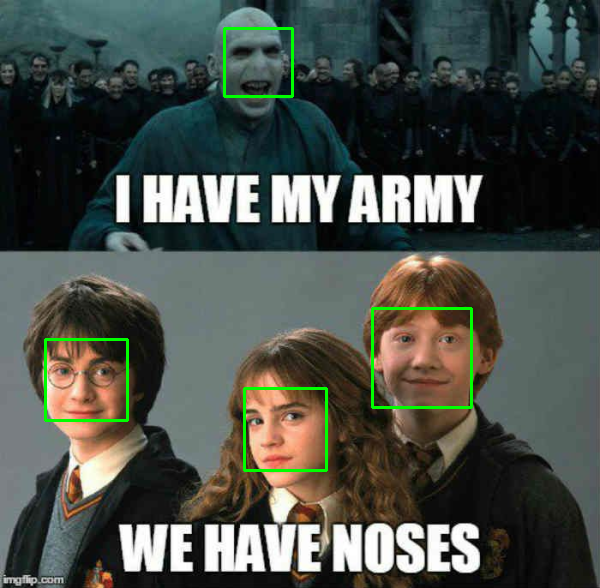

[INFO] loading CNN face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 0.1579 seconds


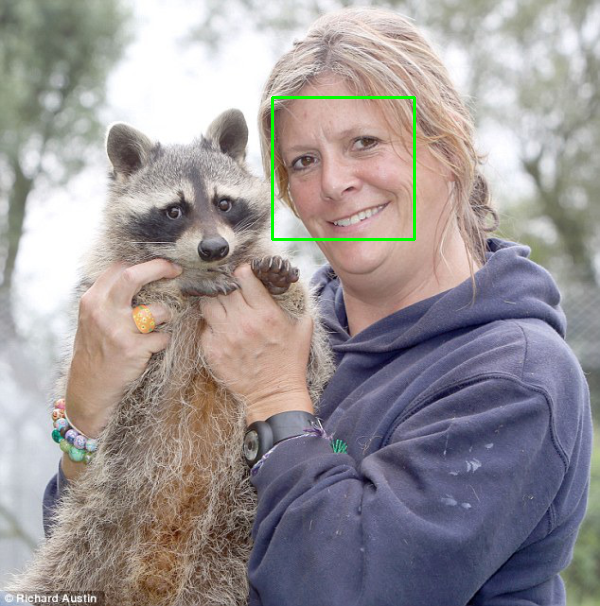

,image_name,total_faces,x,y,w,h
0,harry_1.jpg,4,224,28,68,68
1,harry_1.jpg,4,372,308,99,99
2,harry_1.jpg,4,45,339,82,81
3,harry_1.jpg,4,244,388,82,82
4,raccoon-25.jpg,1,272,97,142,142


In [51]:
df = build_annotations(image_path = ['/content/harry_1.jpg', '/content/raccoon-25.jpg'])
df

harry_1.jpg
[INFO] loading CNN face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 0.1392 seconds


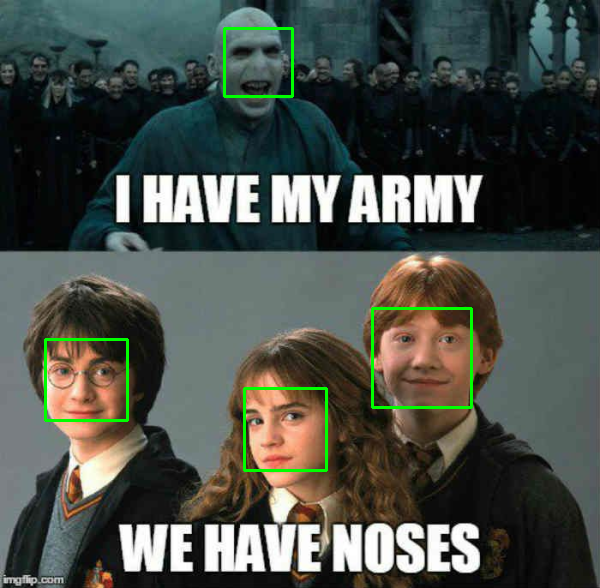

In [52]:
df = build_annotations(image_path = '/content/harry_1.jpg')

In these two examples we see where we give one image as input and in another a list of images. This automation can be further optimized for accepting a csv of images locations where it could be treated as a pandas series following the same procedure once the images are to be treated. 

This problem can be solved using multiple ways. Some of them are -- 

* Haar Cascade Frontal face detector from opencv 
* Dlib's HOG + Linear SVM
* Dlib's Human face detector model using CNN ( Performs deep learning-based face detection using dlib by loading the pre-trained mmod_human_face_detector.dat model from disk) - The one we have used in this example. 
* Human Face detection using any other pre-trained model which gives a high accuracy over benchmark datasets

### References

* Pyimagesearch University blogs on face detection

* Model Attribution - https://github.com/davisking/dlib-models#mmod_human_face_detectordatbz2

* Davis King is the creator of dlib-models github repo which houses a number of popular pre-trained dlib models that have been released in the public domain. 

* Acknowledgement for the dataset: https://www.kaggle.com/ciplab/real-and-fake-face-detection